In [14]:
from ngsaddon import KrylovSolver
from ngsaddon.dff import Filter, FilterGenerator
from ngsolve import *
from netgen.geom2d import SplineGeometry
from ngsolve.webgui import Draw

<Axes: title={'center': 'FOURIER Filter on (0, 357.14285714285717): L = 100, $\\tau$ = 0.0056'}>

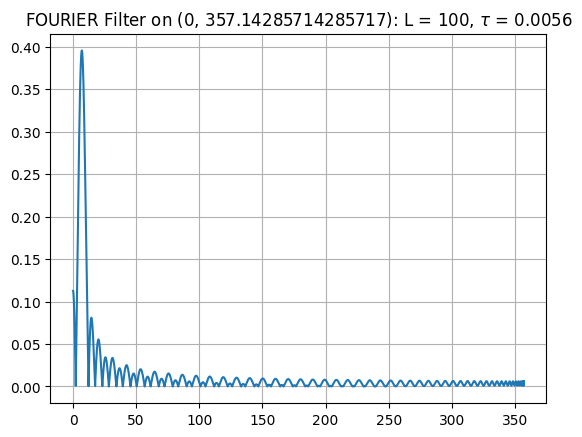

In [31]:
tau = 0.0056        # controlled interval up to omega_end = 360
L = 100

om_min_1, om_max_1 = 6, 8
alpha1 = FilterGenerator(L, tau, om_min_1, om_max_1, 2/tau).fourier()
alpha1.plot()

Triangularization done after 0.02372 seconds:
	629 degrees of freedom.
Discretization matrices computed after 0.04579 seconds.


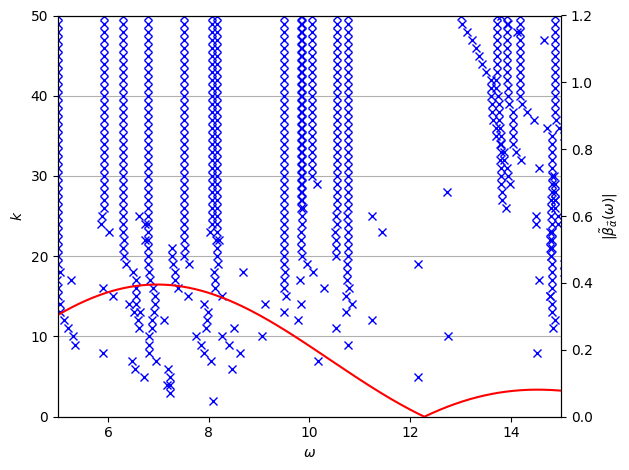

In [32]:
geo = SplineGeometry()
geo.AddRectangle((0,0),(pow(2, 1/3),1))
mesh = Mesh(geo.GenerateMesh(maxh=0.05))
solver = KrylovSolver(mesh, L, tau, alpha1, m_max = 50)
solver.discretize(1)
solver.solve()
solver.plot_results(5, 15, "")

In [33]:
eigval, eigvec = solver.get_single_result(7*7, -1)
print(eigval)
solution = GridFunction(solver.fes, multidim=1)
for i, coord in enumerate(eigvec):
    solution.vecs[0][i] = coord
Draw(solution, mesh, deformation=True)

46.032628419265976


WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

BaseWebGuiScene

Triangularization done after 0.02984 seconds:
	2423 degrees of freedom.
Discretization matrices computed after 0.56615 seconds.


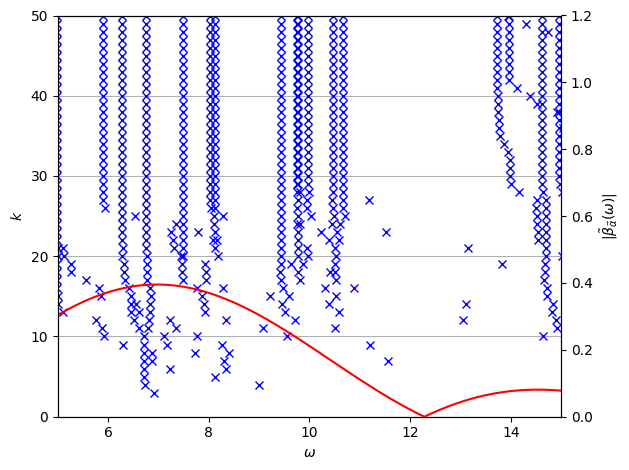

In [34]:
solver2 = KrylovSolver(mesh, L, tau, alpha1, m_max = 50)
solver2.discretize(2)
solver2.solve()
solver2.plot_results(5, 15, "")

In [35]:
eigval, eigvec = solver2.get_single_result(7*7, -1)
print(eigval)
solution2 = GridFunction(solver2.fes, multidim=1)
for i, coord in enumerate(eigvec):
    solution2.vecs[0][i] = coord
Draw(solution2, mesh, deformation=True)

45.696345843599346


WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

BaseWebGuiScene